In [1]:
import scipy.io as scio
import matplotlib.pyplot as plt
dataFile = 'EMIdata.mat'
data = scio.loadmat(dataFile)
data = data['data_all']
import scipy.signal as signal
import numpy as np
print data.shape
print  data.shape[0]/2**18,data.shape[0]/2**22, data.shape[0]/2**23,

(32216000, 1)
122 7 3


In [3]:
data = data.reshape(-1)
print max(data),min(data)

84 -85


32216000


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


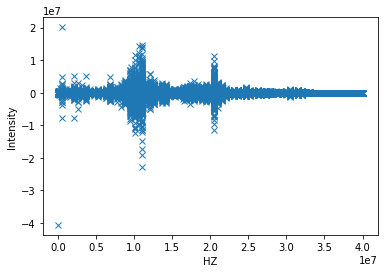

In [33]:
print data.shape[0]
Fs = 8e7
n = data.shape[0]
k = np.arange(n)
T = n/Fs
frq = k/T
frq_1 = frq[range(int(n/2))]

YY = np.fft.fft(data) #
Y1 = YY[range(int(n/2))]

plt.figure(1)
#plt.plot(frq_1,np.abs(Y1))
plt.plot(frq_1,Y1,"x")
plt.xlabel('HZ')
plt.ylabel('Intensity')
plt.savefig("filename.eps",format = 'eps')
plt.show()


In [11]:
plt.close()                               

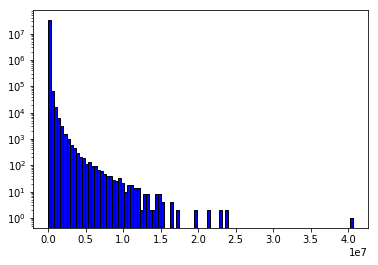

In [12]:
plt.figure('hist')
n, bins, patches = plt.hist(np.abs(YY), bins = 100, normed = 0, edgecolor='black',facecolor='blue', log=True)
plt.show()

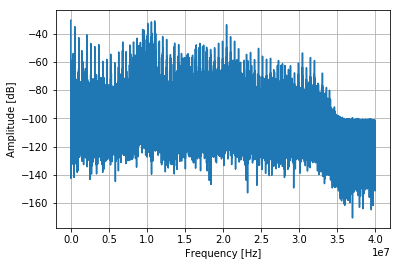

'\nYY = np.fft.fft(data)\nfreq = np.fft.fftfreq(data.shape[0],1/8e7)\nplt.figure(2)\n#plt.plot(freq[10:int(4*1e6)],np.abs(YY[10:int(4*1e6)]))\nmag = 2.0*np.abs(YY)/data.shape[0]\ndb = 20 * np.log10(mag)\nplt.plot(freq,db,"x")\nplt.xlabel(\'HZ\')\nplt.ylabel(\'DB\')9\nplt.savefig("filename_1.eps",format = \'eps\')\nplt.show()\n'

In [6]:


def Norm(x,Max,Min):  
    x = (x - Min) / (Max - Min);  
    return x;  
fs = 8e7
#signal = Norm(data,np.max(data),np.min(data))
signal = data/85.0
N = 8192*2**5
N=2**23
win = np.hamming(N)                                                       
x = signal[0:N] * win                             # Take a slice and multiply by a window

sp = np.fft.rfft(x)                               # Calculate real FFT

mag = np.abs(sp) 
ref = np.sum(win) / 2                             # Reference : window sum and factor of 2
                                                  # because we are using half of FFT spectrum

s_dbfs = 20 * np.log10(mag / ref)                 # Convert to dBFS

freq = np.arange((N / 2) + 1) / (float(N) / fs)   # Frequency axis
plt.plot(freq, s_dbfs)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.show()


"""
YY = np.fft.fft(data)
freq = np.fft.fftfreq(data.shape[0],1/8e7)
plt.figure(2)
#plt.plot(freq[10:int(4*1e6)],np.abs(YY[10:int(4*1e6)]))
mag = 2.0*np.abs(YY)/data.shape[0]
db = 20 * np.log10(mag)
plt.plot(freq,db,"x")
plt.xlabel('HZ')
plt.ylabel('DB')9
plt.savefig("filename_1.eps",format = 'eps')
plt.show()
"""

In [37]:
plt.close()

In [5]:
import numpy
NFFT = data.shape[0]                # number of points in FFT
NTaps = 1                   # number of taps in PFB
M = NTaps * NFFT

# the filter-coefficient-generation section -->
X = numpy.array([(float(i) / NFFT) - (float(NTaps) / 2) for i in range(M)])
PFBCoeff = numpy.sinc(X) * numpy.hanning(M)

revise_data = data*PFBCoeff
print PFBCoeff.shape,data.shape


 (32216000,) (32216000,)


In [6]:
print revise_data.shape

(32216000,)


# print revise_data.shape[0]/4.0
 
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
 
sub_num = 0 
def group(lst, n):
    num = len(lst) % n
    global sub_num
    sub_num = len(lst)//n
    zipped = zip(*[iter(lst)] * n)
    return zipped #if not num else zipped + [lst[-num:], ]

tmp = group(revise_data, 2**23)
raw = group(data,2**23)
#data_1 = np.array(list(tmp[0]))
#data_2 = np.array(list(tmp[1]))
#data_3 = np.array(list(tmp[2]))
#print data_1.shape

#YY_1 = np.fft.fft(data_1)
#YY_2 = np.fft.fft(data_2)
#YY_3 = np.fft.fft(data_3)
#YY = np.abs(YY_1) + np.abs(YY_2) + np.abs(YY_3)
YY=np.zeros_like(tmp[0])
for i in range(sub_num):
    YY += np.abs(np.fft.fft(np.array(list(tmp[i]))))

YY_raw = np.zeros_like(raw[0],dtype=np.float64)
for i in range(sub_num):
    YY_raw += np.abs(np.fft.fft(np.array(list(raw[i]))))

freq = np.fft.fftfreq(YY.shape[0],1/8e7)
print YY.shape

fig,ax = plt.subplots(2,1,sharex = True)
ax[0].plot(freq[10:int(2*1e6)],YY[10:int(1e6)])
ax[0].set_title( "The Polyphase Filter Bank Technique")
ax[1].plot(freq[10:int(1e6)],YY_raw[10:int(1e6)])
ax[1].set_title( "Just split raw_data")
#plt.plot(freq,YY)
plt.xlabel('HZ')
plt.ylabel('Intensity')
#plt.savefig("filename_1.eps",format = 'eps')

plt.show()

(32216000,) (32216000,)
YY_more.shape (131072,)
YY_raw_more.shape (131072,)
freq_more.shape (131072,)
YY_more.shape (262144,)
YY_raw_more.shape (262144,)
freq_more.shape (262144,)
YY_more.shape (4194304,)
YY_raw_more.shape (4194304,)
freq_more.shape (4194304,)
YY_more.shape (8388608,)
YY_raw_more.shape (8388608,)
freq_more.shape (8388608,)
YY_more.shape (8192,)
YY_raw_more.shape (8192,)
freq_more.shape (8192,)


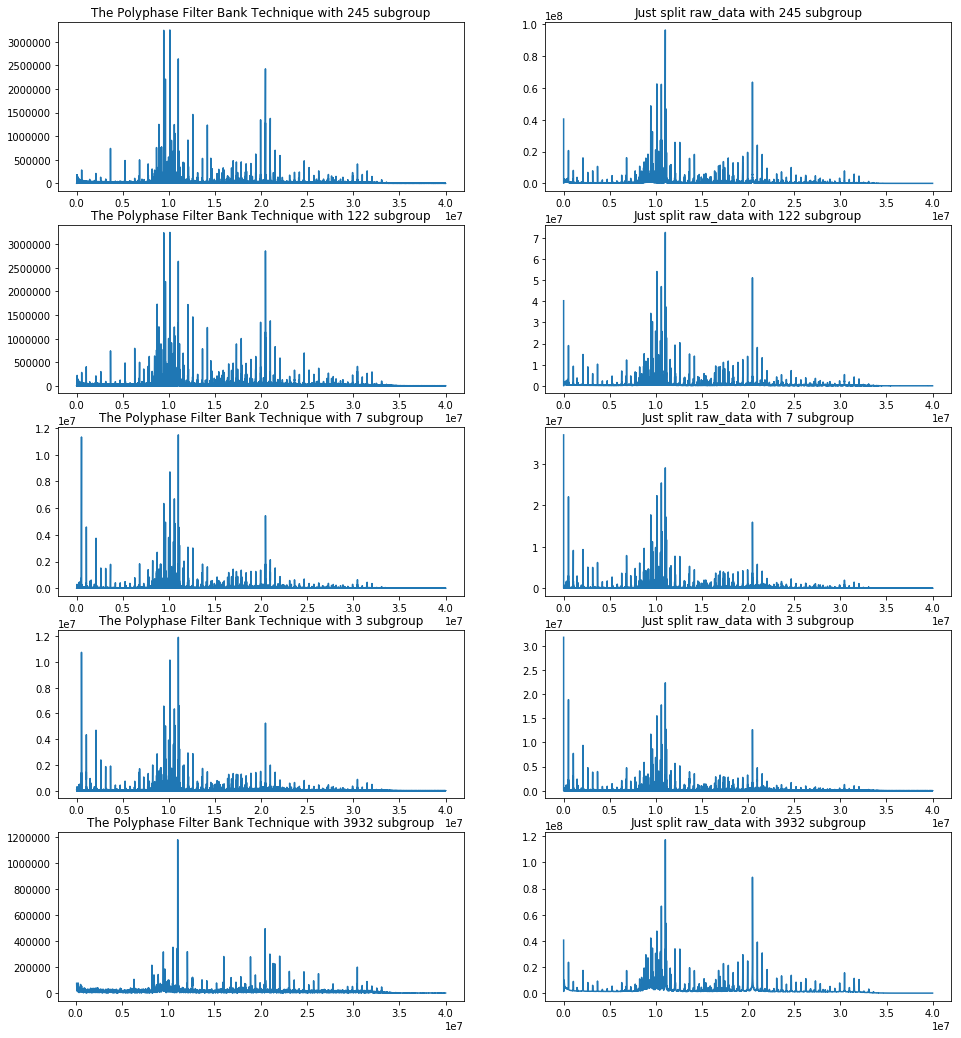

'                               \n#split to 7 subgroup \ntmp = group(revise_data, 2**22)\nraw = group(data,2**22)\n\nYY=np.zeros_like(tmp[0])\nfor i in range(sub_num):\n    YY += np.abs(np.fft.fft(np.array(list(tmp[i]))))\n\nYY_raw = np.zeros_like(raw[0],dtype=np.float64)\nfor i in range(sub_num):\n    YY_raw += np.abs(np.fft.fft(np.array(list(raw[i]))))\n\n#split to 3 group\ntmp = group(revise_data, 2**23)\nraw = group(data,2**23)\n\nYY_less=np.zeros_like(tmp[0])\nfor i in range(sub_num):\n    YY_less += np.abs(np.fft.fft(np.array(list(tmp[i]))))\n\nYY_raw_less = np.zeros_like(raw[0],dtype=np.float64)\nfor i in range(sub_num):\n    YY_raw_less += np.abs(np.fft.fft(np.array(list(raw[i]))))\nfreq = np.fft.fftfreq(YY_less.shape[0],1/8e7)\n\n\nfig,ax = plt.subplots(3,2,sharex = False,figsize = (16,9))\nax[0,0].plot(freq[10:int(1e6)],YY[10:int(1e6)])\nax[0,0].set_title( "The Polyphase Filter Bank Technique with 7 subgroup")\nax[0,1].plot(freq[10:int(1e6)],YY_raw[10:int(1e6)])\nax[0,1].set_

In [22]:
print data.shape,revise_data.shape
sub_num = 0 
def group(lst, n):
    num = len(lst) % n
    global sub_num
    sub_num = len(lst)//n
    zipped = zip(*[iter(lst)] * n)
    return zipped #if not num else zipped + [lst[-num:], ]
#split to 122 subgroup
num_subdata = [2**17,2**18,2**22,2**23,8192]
fig,ax = plt.subplots(len(num_subdata),2,sharex = False,figsize = (16,18))
for ind,val in enumerate(num_subdata):
    
    tmp = group(revise_data, val)
    
    raw = group(data,val)

    YY_more=np.zeros_like(tmp[0])
    for i in range(sub_num):
        #YY_more += np.abs(np.fft.fft(np.array(list(tmp[i]))))
        YY_more += np.array(list(tmp[i]))
    YY_more = np.fft.fft(YY_more)
    YY_more = np.abs(YY_more)
    print "YY_more.shape",YY_more.shape
    
    YY_raw_more = np.zeros_like(raw[0],dtype=np.float64)
    for i in range(sub_num):
        YY_raw_more += np.abs(np.fft.fft(np.array(list(raw[i]))))
    print "YY_raw_more.shape",YY_raw_more.shape
    freq_more = np.fft.fftfreq(YY_more.shape[0],1/8e7)  
    print "freq_more.shape",freq_more.shape
    ax[ind,0].plot(freq_more[10:int(0.5*val)],YY_more[10:int(0.5*val)])
    ax[ind,0].set_title( "The Polyphase Filter Bank Technique with %s subgroup" % sub_num)
    #ax[ind,1].plot(freq_more[10:int(1/3.0*val)],YY_raw_more[10:int(1/3.0*val)])
    ax[ind,1].plot(freq_more[0:int(0.5*val)],YY_raw_more[0:int(0.5*val)])
    ax[ind,1].set_title( "Just split raw_data with %s subgroup" % sub_num )

plt.show()

"""                               
#split to 7 subgroup 
tmp = group(revise_data, 2**22)
raw = group(data,2**22)

YY=np.zeros_like(tmp[0])
for i in range(sub_num):
    YY += np.abs(np.fft.fft(np.array(list(tmp[i]))))

YY_raw = np.zeros_like(raw[0],dtype=np.float64)
for i in range(sub_num):
    YY_raw += np.abs(np.fft.fft(np.array(list(raw[i]))))

#split to 3 group
tmp = group(revise_data, 2**23)
raw = group(data,2**23)

YY_less=np.zeros_like(tmp[0])
for i in range(sub_num):
    YY_less += np.abs(np.fft.fft(np.array(list(tmp[i]))))

YY_raw_less = np.zeros_like(raw[0],dtype=np.float64)
for i in range(sub_num):
    YY_raw_less += np.abs(np.fft.fft(np.array(list(raw[i]))))
freq = np.fft.fftfreq(YY_less.shape[0],1/8e7)


fig,ax = plt.subplots(3,2,sharex = False,figsize = (16,9))
ax[0,0].plot(freq[10:int(1e6)],YY[10:int(1e6)])
ax[0,0].set_title( "The Polyphase Filter Bank Technique with 7 subgroup")
ax[0,1].plot(freq[10:int(1e6)],YY_raw[10:int(1e6)])
ax[0,1].set_title( "Just split raw_data with 7 subgroup")

ax[1,0].plot(freq[10:int(2*1e6)],YY_less[10:int(2*1e6)])
ax[1,0].set_title( "The Polyphase Filter Bank Technique with 3 subgroup")
ax[1,1].plot(freq[10:int(2*1e6)],YY_raw_less[10:int(2*1e6)])
ax[1,1].set_title( "Just split raw_data with 3 subgroup")

ax[2,0].plot(freq[10:int(2*1e6)],YY_more[10:int(2*1e6)])
ax[2,0].set_title( "The Polyphase Filter Bank Technique with 122 subgroup")
ax[2,1].plot(freq[10:int(2*1e6)],YY_raw_more[10:int(2*1e6)])
ax[2,1].set_title( "Just split raw_data with 122 subgroup")
#plt.plot(freq,YY)
plt.xlabel('HZ')
plt.ylabel('Intensity')
#plt.savefig("filename_1.eps",format = 'eps')

plt.show()
"""

mask = np.ones((2,3),dtype=np.bool)
vis = np.ones_like(mask,dtype=np.float64)
new_vis = np.ma.masked_array(vis,mask = mask)
print new_vis
np.ma.std(new_vis,axis = 0)

In [21]:
plt.close()

In [27]:
print data.shape
add = np.zeros((33554432-32216000,))

print 2**25
print add.shape
add_data = np.array(list(data)+list(add))
print add_data.shape

(32216000,)
33554432
(1338432,)
(33554432,)


(33554432,) YY_more.shape (131072,)
YY_raw_more.shape (131072,)
freq_more.shape (131072,)
(33554432,) YY_more.shape (262144,)
YY_raw_more.shape (262144,)
freq_more.shape (262144,)
(33554432,) YY_more.shape (4194304,)
YY_raw_more.shape (4194304,)
freq_more.shape (4194304,)
(33554432,) YY_more.shape (8388608,)
YY_raw_more.shape (8388608,)
freq_more.shape (8388608,)
(33554432,) YY_more.shape (8192,)
YY_raw_more.shape (8192,)
freq_more.shape (8192,)


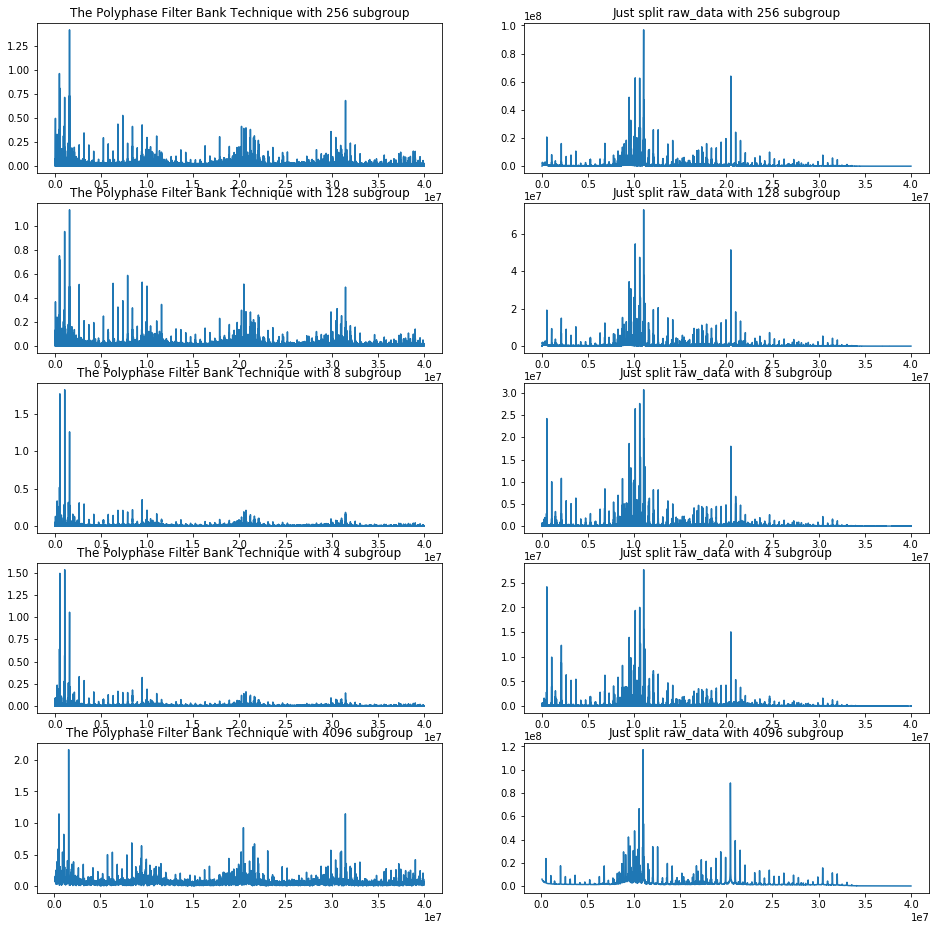

In [32]:
import scipy
def generate_win_coeffs(M, P, window_fn="hamming"):
    win_coeffs = scipy.signal.get_window(window_fn, M*P)
    sinc       = scipy.signal.firwin(M * P, cutoff=1.0/P, window="rectangular")
    win_coeffs *= sinc
    return win_coeffs

sub_num = 0 
def group(lst, n):
    num = len(lst) % n
    global sub_num
    sub_num = len(lst)//n
    zipped = zip(*[iter(lst)] * n)
    return zipped

num_subdata = [2**17,2**18,2**22,2**23,2**13]
fig,ax = plt.subplots(len(num_subdata),2,sharex = False,figsize = (16,16))

for ind,val in enumerate(num_subdata):
    M = add_data.shape[0] // val
    P = val
    coeff = generate_win_coeffs(M,P)
    print coeff.shape,
    revise_data = add_data * coeff
    
    tmp = group(revise_data, val)
    raw = group(add_data,val)

    YY_more=np.zeros_like(tmp[0])
    for i in range(sub_num):
        #YY_more += np.abs(np.fft.fft(np.array(list(tmp[i]))))
        YY_more += np.abs(np.array(list(tmp[i])))
    YY_more = np.fft.fft(YY_more)
    YY_more = np.abs(YY_more)
    print "YY_more.shape",YY_more.shape
    
    YY_raw_more = np.zeros_like(raw[0],dtype=np.float64)
    for i in range(sub_num):
        YY_raw_more += np.abs(np.fft.fft(np.array(list(raw[i]))))
    print "YY_raw_more.shape",YY_raw_more.shape
    freq_more = np.fft.fftfreq(YY_more.shape[0],1/8e7)  
    print "freq_more.shape",freq_more.shape
    ax[ind,0].plot(freq_more[10:int(1/2.0*val)],YY_more[10:int(1/2.0*val)])
    ax[ind,0].set_title( "The Polyphase Filter Bank Technique with %s subgroup" % sub_num)
    ax[ind,1].plot(freq_more[10:int(1/2.0*val)],YY_raw_more[10:int(1/2.0*val)])
    ax[ind,1].set_title( "Just split raw_data with %s subgroup" % sub_num )

plt.show()

In [31]:
plt.close()

In [25]:
2**13

8192